In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data=pd.read_csv('iris.csv.data',names=['sepal-length','sepal-width','petal-length','petal-width','class'])
data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


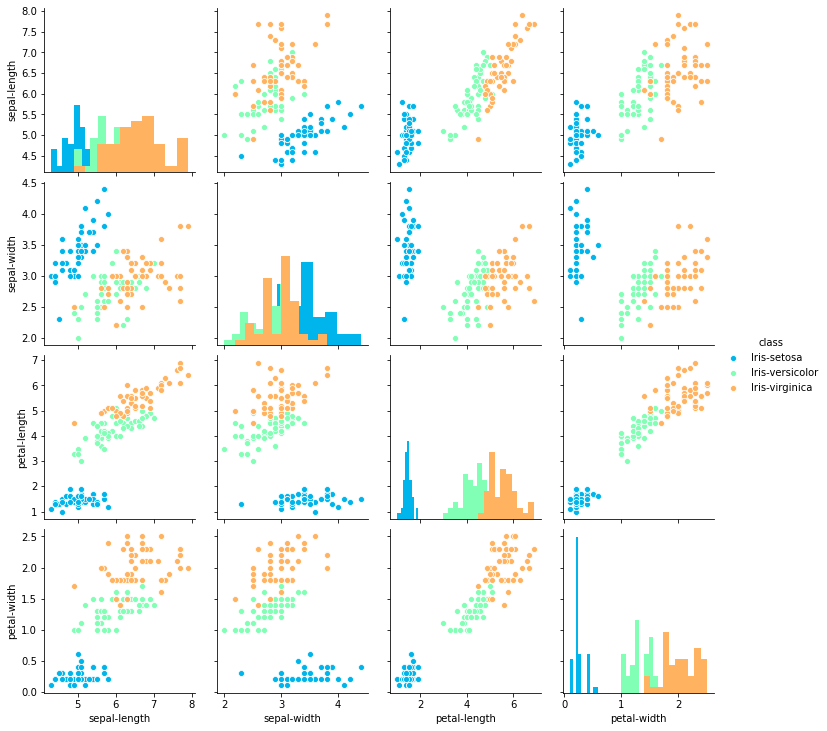

In [29]:
sns.pairplot(data,hue='class',palette='rainbow',diag_kind='hist')

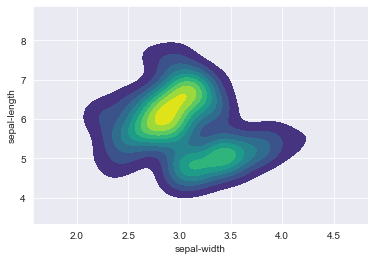

In [45]:
sns.set_style('darkgrid')
setosa=data[data['class']=='setosa']
sns.kdeplot(data['sepal-width'],data['sepal-length'],shade=True,shade_lowest=False,legend=True,cmap='viridis')


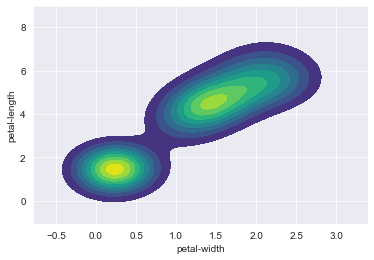

In [46]:
sns.kdeplot(data['petal-width'],data['petal-length'],shade=True,shade_lowest=False,legend=True,cmap='viridis')

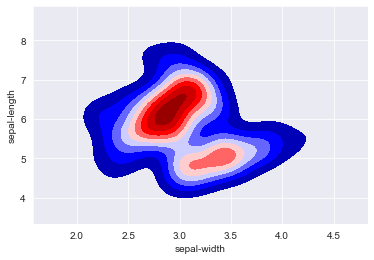

In [47]:
versicolor=data[data['class']=='versicolor']
sns.kdeplot(data['sepal-width'],data['sepal-length'],cmap='seismic',shade=True,shade_lowest=False,legend=True)

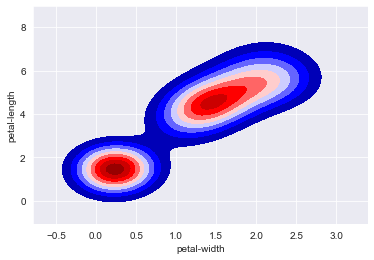

In [48]:
sns.kdeplot(data['petal-width'],data['petal-length'],shade=True,shade_lowest=False,legend=True,cmap='seismic')

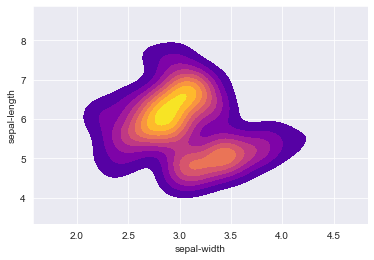

In [49]:
virginica=data[data['class']=='virginica']
sns.kdeplot(data['sepal-width'],data['sepal-length'],cmap='plasma',shade=True,shade_lowest=False,legend=True)

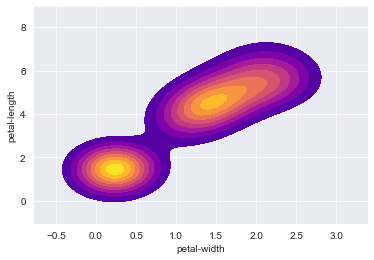

In [50]:
sns.kdeplot(data['petal-width'],data['petal-length'],cmap='plasma',shade=True,shade_lowest=False,legend=True)

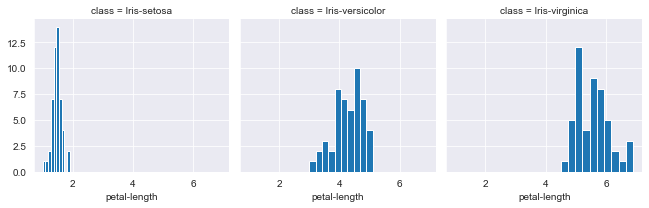

In [52]:
g=sns.FacetGrid(data,col='class')
g.map(plt.hist,'petal-length')

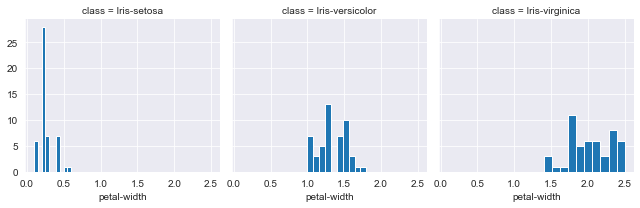

In [53]:
g=sns.FacetGrid(data,col='class')
g.map(plt.hist,'petal-width')

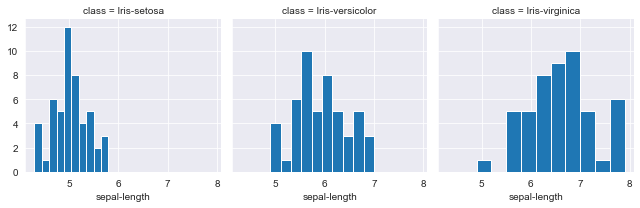

In [54]:
g=sns.FacetGrid(data,col='class')
g.map(plt.hist,'sepal-length')

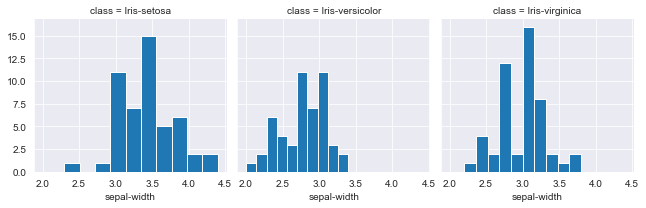

In [55]:
g=sns.FacetGrid(data,col='class')
g.map(plt.hist,'sepal-width')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=data.drop('class',axis=1)
y=data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.svm import SVC

In [59]:
svm=SVC()

In [60]:
svm.fit(X_train,y_train)

SVC()

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
pred=svm.predict(X_test)

In [63]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
nb=MultinomialNB()

In [66]:
nb.fit(X_train,y_train)

MultinomialNB()

In [67]:
prediction=nb.predict(X_test)

In [68]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[13  0  0]
 [ 0  0 20]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.00      0.00      0.00        20
 Iris-virginica       0.38      1.00      0.55        12

       accuracy                           0.56        45
      macro avg       0.46      0.67      0.52        45
   weighted avg       0.39      0.56      0.43        45



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [76]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.857, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.905, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=4)

In [77]:
grid_pred=grid.predict(X_test)

In [78]:
print(confusion_matrix(y_test,grid_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [79]:
print(classification_report(y_test,grid_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

